# Q1

After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

In [19]:
print(data_prof.info(verbose=True,null_counts=True))

/tmp/ipykernel_7240/73715923.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(data_prof.info(verbose=True,null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   sid                  4509586 non-null  int64  
 1   profile_id           4477139 non-null  float64
 2   profile_name         4509586 non-null  object 
 3   firstname_lastname   4221121 non-null  object 
 4   description          2453590 non-null  object 
 5   following            3452771 non-null  float64
 6   followers            3452771 non-null  float64
 7   n_posts              3452771 non-null  float64
 8   url                  870274 non-null   object 
 9   cts                  4071098 non-null  object 
 10  is_business_account  3445323 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB
None


** Description

In [3]:
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=5000000):
    print(chunk.info(verbose=True,null_counts=True))

/tmp/ipykernel_23989/91558128.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(chunk.info(verbose=True,null_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   sid              5000000 non-null  int64  
 1   sid_profile      5000000 non-null  int64  
 2   post_id          5000000 non-null  object 
 3   profile_id       4999863 non-null  float64
 4   location_id      4993723 non-null  float64
 5   cts              5000000 non-null  object 
 6   post_type        5000000 non-null  int64  
 7   description      4586011 non-null  object 
 8   numbr_likes      5000000 non-null  int64  
 9   number_comments  5000000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 381.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 5000000 to 9999999
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   sid              50000

** Description


In [39]:
location2=pd.read_csv('~/instagram_locations.csv', delimiter='\t')

In [ ]:
location2.info

# Q2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections


Plot the number of posts for each profile in descending order.


In [3]:
data_prof= pd.read_csv('~/instagram_profiles.csv',delimiter='\t')
data_prof.sort_values(by='n_posts',ascending=False).head() #sort the values by the field n_post

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True


What posts have the highest number of "likes"?

In [29]:
data_post=pd.read_csv('~/instagram_posts.csv',delimiter='\t',usecols=['numbr_likes','post_id'])

    

In [30]:
data_post.sort_values(by='numbr_likes', ascending=False).head()


,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745.0


What posts have the most and the least number of comments?

In [2]:
data_po=pd.read_csv('~/instagram_posts.csv',delimiter='\t',usecols=['number_comments','post_id'])

In [4]:
data_po.sort_values(by='number_comments', ascending=False).head()

,post_id,number_comments
41873060,Bx2sPAjHviO,488953.0
12164781,BuGjhWAhAW5,313997.0
33261751,BJ-rkpTgn1N,257488.0
11149127,BMtisIxjhtT,214365.0
9383817,BzOOWj3DfZK,189888.0


In [6]:
data_po.dropna(subset=['number_comments'],inplace=True)
data_po.sort_values(by='number_comments', ascending=True).head()

,post_id,number_comments
0,BXdjjUlgcgq,0.0
13108581,BzWK_KVgiXi,0.0
13108584,By8bFqQgkT6,0.0
13108585,By3Pm79hK1Y,0.0
13108586,BysF45eANuV,0.0


How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

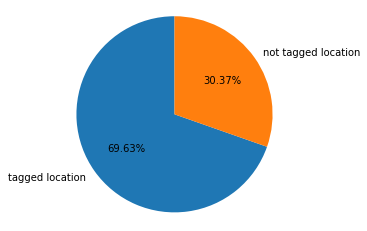

In [26]:
field=['location_id']
loc=0 #number of posts with tagged location
not_loc=0 #number of posts without tagged location
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    not_loc += chunk['location_id'].isna().sum() #to see if a post has no location 
    loc += chunk['location_id'].notna().sum() #to see in a location is tagged we check if the value is not NaN
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'tagged location', 'not tagged location'
sizes = [loc,not_loc]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

How many posts include only photos? How many also have videos?

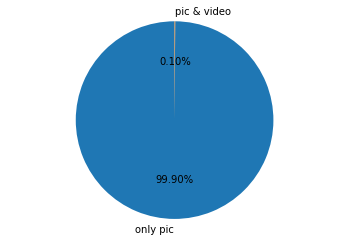

In [39]:
pic=[]
both=[]
field=['post_id','post_type']
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    chunk.post_type.dropna(inplace=True)
    pic.append(chunk.loc[chunk['post_type']==1,'post_id'].tolist())  
    both.append(chunk.loc[chunk['post_type']==3,'post_id'].tolist())  
        
pic2=[y for el in pic for y in el]
both2=[y for el in both for y in el]
pic3=len(pic2)
both3=len(both2)        
labels = 'only pic', 'pic & video'
sizes = [pic3,both3]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

(-1.1013247030576128,
 1.1051349205456826,
 -1.1050601427543152,
 1.100240959178777)

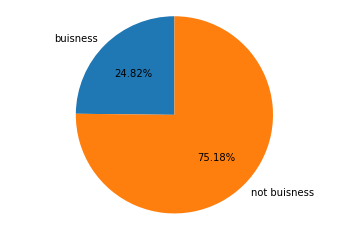

In [5]:
data_prof.dropna(subset=['is_business_account'],inplace=True)
yes=len(data_prof[data_prof['is_business_account']==True])
no=len(data_prof[data_prof['is_business_account']==False])

labels = 'buisness', 'not buisness'
sizes = [yes,no]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# [RQ3]
What is the most common time in which users publish their posts?

In [27]:
posts = pd.read_csv("/home/ec2-user/instagram_posts.zip",delimiter="\t",usecols=["cts","post_id"],
                   parse_dates=['cts'], date_parser=pd.to_datetime)

In [28]:
m = np.argmax(posts.groupby([posts['cts'].dt.hour]).post_id.count())
print(f"The most common hour is {m}")

The most common hour is 19


<AxesSubplot:title={'center':'Posts per hour'}, xlabel='Hour'>

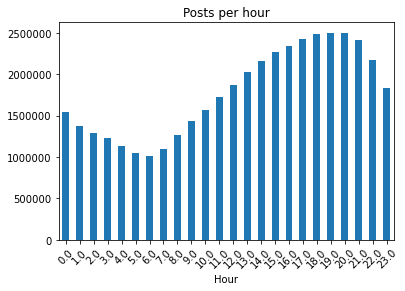

In [41]:
plt.ticklabel_format(style='plain')
posts.groupby([posts['cts'].dt.hour]).post_id.count().plot(kind="bar",title="Posts per hour",rot=45,xlabel="Hour")

Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval

In [6]:
posts = pd.read_csv("/home/ec2-user/instagram_posts.zip",delimiter="\t",chunksize=1000000,
                   parse_dates=['cts'], date_parser=pd.to_datetime)

In [7]:
def time_post(df:pd.DataFrame, intervals:list):
    """
    Returns a dataframe with the number of posts per time interval 
    """
    result = pd.DataFrame()
    df.index = df["cts"]
    for i in intervals:
        init_time, fin_time = i[0],i[1]
        number_of_posts = len(df.between_time(init_time, fin_time))
        result.insert(0, init_time.split(":")[0], [number_of_posts])
    return result

Use the function that you created in the previous literal to plot the number of posts between the following time intervals:

In [8]:
intervals = [["06:00:00","10:59:59"],["11:00:00","13:59:59"],["14:00:00","16:59:59"],["17:00:00","19:59:59"],["20:00:00","23:59:59"],["00:00:00","02:59:59"],["03:00:00","05:59:59"]]

In [9]:
new_df = pd.DataFrame()
for chunk in posts:
    chunk.index = chunk["cts"]    #  necessary to use "between_time" method
    new_df = new_df.append(time_post(chunk,intervals))

<AxesSubplot:xlabel='Hour', ylabel='# of posts (10^6)'>

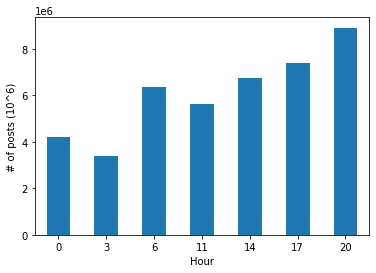

In [25]:
new_df.columns = new_df.columns.astype(int)
new_df = new_df.T.sort_index()
new_df[new_df.columns].sum().plot(kind="bar",rot=0,xlabel="Hour",ylabel="# of posts (10^6)",legend=False)

## [RQ4] 
In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.

Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [13]:
def retireve_posts(df:pd.DataFrame, pid:float):
    """
    returns a dataframe with posts belonging to pid
    """
    return df[df["profile_id"]==pid]

In [38]:
new_df = pd.DataFrame()
for chunk in posts:
    new_df = new_df.append(retireve_posts(chunk,pid))

Write another function that, given an input n, will return the posts that belong to the n top posted profiles.

In [9]:
acc = pd.read_csv("/home/ec2-user/instagram_profiles.zip",delimiter="\t", )

In [3]:
# considering only post_id and profile_id columns to reduce memory usage 
posts = pd.read_csv("/home/ec2-user/instagram_posts.zip",delimiter="\t",usecols=["post_id","profile_id"])

In [7]:
def top_n_posters(acc:pd.DataFrame, posts:pd.DataFrame, n:int):
    top = acc.sort_values(by=['n_posts'],ascending=False).head(n)
    final_df = pd.DataFrame()
    for pid in top["profile_id"]:
        final_df = final_df.append(retireve_posts(posts,pid))
    return final_df

In [6]:
top_posts = top_n_posters(acc,posts,10)
top_posts

,post_id,profile_id
9592952,Bq3hP3Khp8J,199664772.0
9592953,Bq3hN53hUsD,199664772.0
9592954,BCqCe9LypeF,199664772.0
9592955,20Wu4zypd2,199664772.0
9592956,BrKq76AhadU,199664772.0
...,...,...
11565172,Bz2KZMWAzaS,285549744.0
11565173,Bz2KIsGguxY,285549744.0
11565174,Bz2JMmhA1Bv,285549744.0
27484079,BxR5tuQAfxT,285549744.0


What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts?

In [10]:
posts = pd.read_csv("/home/ec2-user/instagram_posts.zip",delimiter="\t",
                usecols=["post_id","profile_id","numbr_likes","number_comments"])

In [11]:
top_posts = top_n_posters(acc,posts,10)

*total avearge number of likes and comments*

In [11]:
cols_rename = {"numbr_likes":"avg likes","number_comments":"avg comments"}
top_posts[["numbr_likes","number_comments"]].mean().to_frame().T.rename(cols_rename,axis=1)

,avg likes,avg comments
0,3.171348,0.033708


*average number of likes and comments per account*

In [12]:
top_posts[["profile_id","numbr_likes","number_comments"]].groupby("profile_id").mean().rename(cols_rename,axis=1)

,avg likes,avg comments
profile_id,,
9.813508e+06,0.296296,0.000000
1.996648e+08,7.666667,0.000000
2.181730e+08,0.400000,0.040000
2.855497e+08,3.921875,0.000000
1.087614e+09,2.026316,0.184211
1.273455e+09,2.960000,0.040000
1.603890e+09,6.477612,0.044776
1.607309e+09,1.540541,0.000000
8.563367e+09,0.000000,0.000000


Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

In [5]:
posts = pd.read_csv("/home/ec2-user/instagram_posts.zip",delimiter="\t",
                usecols=["post_id","profile_id","cts"],
                parse_dates=['cts'], date_parser=pd.to_datetime)

In [14]:
top_posters = top_n_posters(acc,posts,10)
top_posts = posts[posts["profile_id"].isin(top_posters["profile_id"])]

<AxesSubplot:xlabel='Hour', ylabel='n° of posts'>

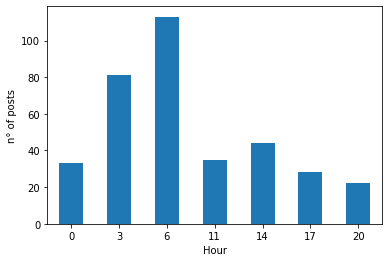

In [15]:
result = time_post(top_posters, intervals)
result.columns = result.columns.astype(int)
res_plot = result.T.sort_index()
res_plot.plot(kind="bar",sort_columns=True,rot=0,xlabel="Hour",ylabel="n° of posts",legend=False)

## [RQ5] 

The most influential users are the ones with the highest number of “followers", you can now look more into their activity.

Plot the top 10 most popular users in terms of followers and their number of posts.

<AxesSubplot:xlabel='profile_name'>

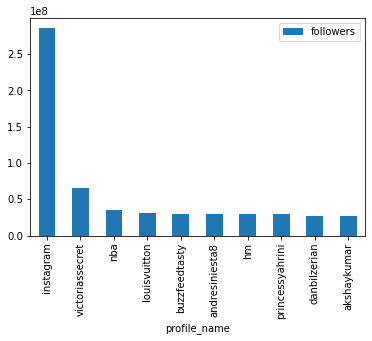

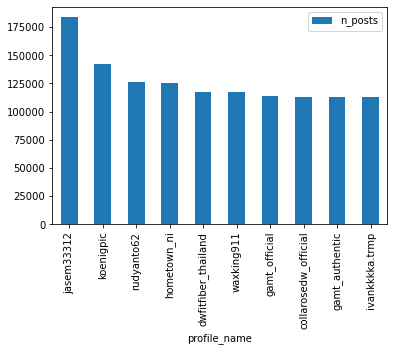

In [8]:
top_follower= data_prof.sort_values(by='followers', ascending=False).head(10)
top_post= data_prof.sort_values(by='n_posts', ascending=False).head(10)
top_follower.plot.bar(x = 'profile_name', y='followers')
top_post.plot.bar(x = 'profile_name', y='n_posts')

Who is the most influential user?

In [15]:
most_influencer=top_follower['profile_name'].iloc[0]
most_influencer

'instagram'

Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [9]:
loc=[]

field=['profile_id','location_id'] # field that will be load in the chunk dataframe
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    chunk.dropna(inplace=True) #not considering NaN values
    loc.append(chunk.loc[chunk['profile_id'].isin(top_follower['profile_id']),'location_id'].tolist()) # loc will be a nested list
location_list=[ id_loc for el in loc for id_loc in el]


In [26]:

field=['id','city']
location_= pd.read_csv('~/instagram_locations.csv', delimiter='\t', usecols=field)
location_.dropna(subset=['city'],inplace=True)
city=location_.loc[location_['id'].isin(location_list), 'city'].tolist()
cont=collections.Counter(city)
#the most frequent areas are
print('The most frequent areas are:',cont.most_common(3))

The most frequent areas are: [('New York, New York', 9), ('Singapore', 4), ('Los Angeles, California', 4)]


<AxesSubplot:xlabel='city', ylabel='visited'>

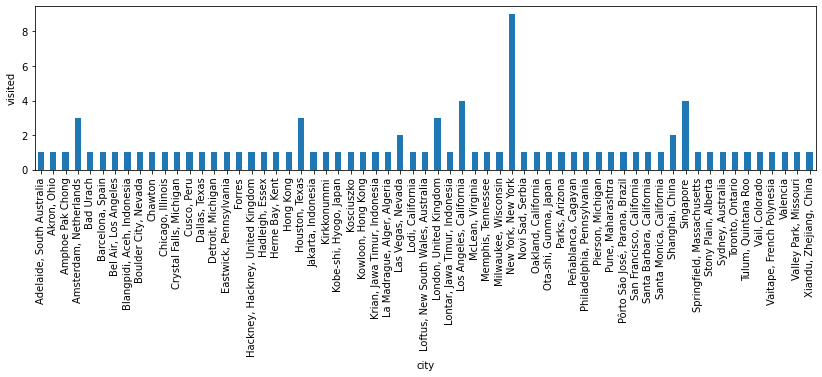

In [36]:
c=pd.DataFrame([dict(cont)])
res_plot = c.T.sort_index()
res_plot.plot.bar(figsize=(14,3),xlabel="city",ylabel="visited",legend=False)

How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

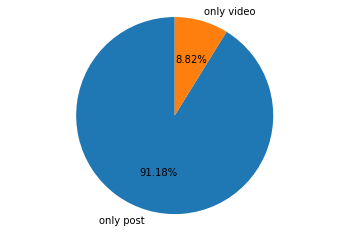

In [34]:
post=[]
video=[]

profile_id_given=2.502532e+07
field=['post_id','profile_id','post_type']
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    chunk.dropna(inplace=True)
    if profile_id_given in chunk['profile_id'].values:
        post.append(chunk.loc[(chunk['profile_id'] == profile_id_given) & (chunk['post_type']==1),'post_id'].tolist())  
        video.append(chunk.loc[(chunk['profile_id'] == profile_id_given) & (chunk['post_type']==2),'post_id'].tolist())  
        
post2=[y for el in post for y in el]
video2=[y for el in video for y in el]
post3=len(post2)
video3=len(video2)
labels = 'only post', 'only video'
sizes = [post3,video3]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

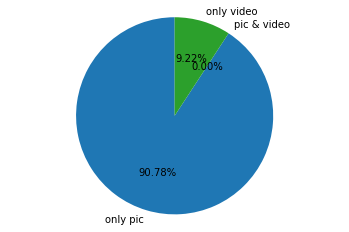

In [10]:
post=[]
both=[]
video=[]
field=['post_id','profile_id','post_type']
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    chunk.dropna(subset=['post_type'],inplace=True)
    post.append(chunk.loc[(chunk['profile_id'].isin( top_follower['profile_id']) & (chunk['post_type']==1)),'post_id'].tolist())   
    both.append(chunk.loc[(chunk['profile_id'].isin( top_follower['profile_id']) & (chunk['post_type']==3)),'post_id'].tolist())   
    video.append(chunk.loc[(chunk['profile_id'].isin( top_follower['profile_id']) & (chunk['post_type']==2)),'post_id'].tolist())   
        
post2=[y for el in post for y in el]
video2=[y for el in video for y in el]
both2=[y for el in both for y in el]
perc_both=len(both2)
perc_post=len(post2) #number of picture-only post
perc_video=len(video2)     
labels = 'only pic', 'pic & video','only video'
sizes = [perc_post,perc_both,perc_video]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

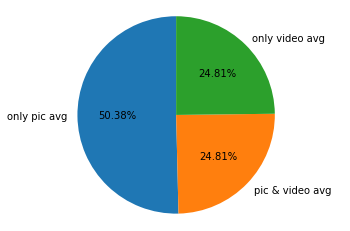

In [13]:
post=[]
both=[]
video=[]
field=['numbr_likes','profile_id','post_type']
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    chunk.dropna(subset=['post_type'],inplace=True)
    post.append(chunk.loc[(chunk['profile_id'].isin( top_follower['profile_id']) & (chunk['post_type']==1)),'numbr_likes'].tolist())
    both.append(chunk.loc[(chunk['profile_id'].isin( top_follower['profile_id']) & (chunk['post_type']==3)),'numbr_likes'].tolist())   
    video.append(chunk.loc[(chunk['profile_id'].isin( top_follower['profile_id']) & (chunk['post_type']==2)),'numbr_likes'].tolist())
post2=[y for el in post for y in el]
video2=[y for el in video for y in el]
both2=[y for el in video for y in el]
avg_post=sum(post2)/len(post2)
avg_video=sum(video2)/len(video2)
avg_both=sum(both2)/len(both2)
labels = 'only pic avg', 'pic & video avg','only video avg'
sizes = [avg_post,avg_both,avg_video]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

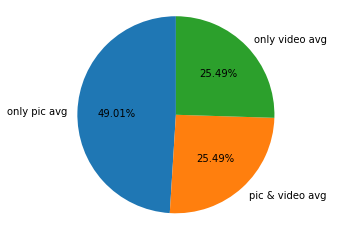

In [14]:
post=[]
both=[]
video=[]
field=['number_comments','profile_id','post_type']
for chunk in pd.read_csv('~/instagram_posts.csv', delimiter='\t', chunksize=500000, usecols=field):
    chunk.dropna(subset=['post_type'],inplace=True)
    post.append(chunk.loc[(chunk['profile_id'].isin( top_follower['profile_id']) & (chunk['post_type']==1)),'number_comments'].tolist())
    both.append(chunk.loc[(chunk['profile_id'].isin( top_follower['profile_id']) & (chunk['post_type']==3)),'number_comments'].tolist())   
    video.append(chunk.loc[(chunk['profile_id'].isin( top_follower['profile_id']) & (chunk['post_type']==2)),'number_comments'].tolist())
post2=[y for el in post for y in el]
video2=[y for el in video for y in el]
both2=[y for el in video for y in el]
avg_post=sum(post2)/len(post2)
avg_video=sum(video2)/len(video2)
avg_both=sum(both2)/len(both2)
labels = 'only pic avg', 'pic & video avg','only video avg'
sizes = [avg_post,avg_both,avg_video]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, startangle=90,autopct='%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# [RQ6]
What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following.

In [2]:
posts = pd.read_csv("/home/ec2-user/instagram_posts.zip",delimiter="\t",lineterminator="\n",
                    usecols = ["post_id","profile_id","cts"])

In [6]:
# filtering the profiles with at least more than the 1st quartile
# it's more efficient and the mean has no meaning with few posts

post_per_profile = posts.groupby("profile_id")["post_id"].count()
quant = np.quantile(post_per_profile, .25)
gt2_filter = pd.DataFrame(post_per_profile > quant)
gt2_filter.rename(columns={"post_id":"has_minimum_posts"},inplace=True)

In [7]:
# significant profile set
s_prof = posts.join(gt2_filter, how="left",on="profile_id")
s_prof = s_prof[s_prof["has_minimum_posts"]==True]
s_prof["cts"] = s_prof["cts"].astype("datetime64[ns]")

posts = None # very bad way to free memory

# sorting values on cts for later use (shifting)
s_prof.sort_values(["profile_id","cts"],ascending=False,inplace=True)

In [8]:
# Creating the "time_delta" column by copying the "cts" column 
# and then shifting 1 row up and subtracting

previous_post = s_prof.groupby("profile_id")["cts"].shift(-1)
time_delta = s_prof["cts"]-previous_post

In [9]:
# Adding the time_delta column to the posts dataframe
s_prof.insert(3,"time_delta",time_delta)

In [24]:
more_than_zero = s_prof[s_prof["time_delta"] > pd.Timedelta(0)]    # ignoring posts with 0 seconds

mean_time_delts = more_than_zero.groupby("profile_id")["time_delta"].mean()

In [25]:
top = mean_time_delts.sort_values().head(3)
print("the top profiles are:")
pd.DataFrame(top)

the top profiles are:


,time_delta
profile_id,
7.121258e+09,0 days 00:00:01
8.574180e+09,0 days 00:00:01
4.675640e+07,0 days 00:00:01


What is the average time a user lets pass before oublishing another post?

In [26]:
t = mean_time_delts.sort_values().mean()
print(f"The average time delta between posts is {t}")

The average time delta between posts is 76 days 17:09:51.191385855


Plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts